# Initial data check

This document is used for viewing and analyzing at the data different objects creates.

## Imports

In [29]:
%load_ext autoreload
%autoreload 1

import csv
%aimport helpers
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
matplotlib.style.use('ggplot')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Fill data

In [30]:
raw_data = helpers.read_raw_data('../data/2016-07-14.csv')
raw_data[:3]

[['2016-07-14 22:06:57.934272', 'A', '3995', '227', '137', '64', '647', '355'],
 ['2016-07-14 22:06:57.934272', 'A', '4047', '95', '267', '46', '576', '55'],
 ['2016-07-14 22:06:57.934272', 'A', '4099', '63', '335', '73', '467', '37']]

#### Raw data format

0. Read identifier, unique for each "read" of values
1. Label - Identifier of object used to read data
2. MS since arduino started at read (will loop after 70 hours, see documentation
3. Sensor A0
4. Sensor A1
5. Sensor A2
6. Sensor A3
7. Sensor A4 (not interesting, dishwasher sensor)

### Split into readings

dict: key = reading, value = [reading]

In [31]:
raw_data_readings = helpers.split_data_based_on_readings(raw_data)
for k,v in raw_data_readings.items():
    print('reading {} has {} rows'.format(k, len(v)))

reading 2016-07-14 22:08:24.922800 has 66 rows
reading 2016-07-14 22:08:30.628409 has 55 rows
reading 2016-07-14 22:07:12.683722 has 114 rows
reading 2016-07-14 22:08:20.231359 has 57 rows
reading 2016-07-14 22:07:03.809563 has 111 rows
reading 2016-07-14 22:06:57.934272 has 41 rows


## Visualize readings

Note that readings from sensor a4 is not interesting at this time as this sensor is ment to measure the dishwasher...

On another note, the dishwasher should probably use a light sensor, so we might find a place for it! :)

### Reading 1

#### Create pandas dataframe

In [39]:
#id for current reading that is looked at
curr_reading_id = '2016-07-14 22:06:57.934272'

reading1_df = pd.DataFrame(data=raw_data_readings[curr_reading_id], columns=['identifier', 'label', 'ms', 'a0', 'a1', 'a2', 'a3', 'a4'])
reading1_df = reading1_df[['ms', 'a0', 'a1', 'a2', 'a3', 'a4']].astype(float)

#### Add mean and max values

// TODO: Should be moved out to helpers, if data is helpful should be reusable when running final app.

In [40]:
reading1_df['mean'] = reading1_df[['a0','a1','a2','a3']].mean(axis=1)
reading1_df['max'] = reading1_df[['a0','a1','a2','a3']].max(axis=1)
reading1_df.head()

,ms,a0,a1,a2,a3,a4,mean,max
0,3995.0,227.0,137.0,64.0,647.0,355.0,268.75,647.0
1,4047.0,95.0,267.0,46.0,576.0,55.0,246.00,576.0
2,4099.0,63.0,335.0,73.0,467.0,37.0,234.50,467.0
3,4150.0,49.0,380.0,87.0,358.0,2.0,218.50,380.0
4,4201.0,0.0,346.0,0.0,291.0,0.0,159.25,346.0


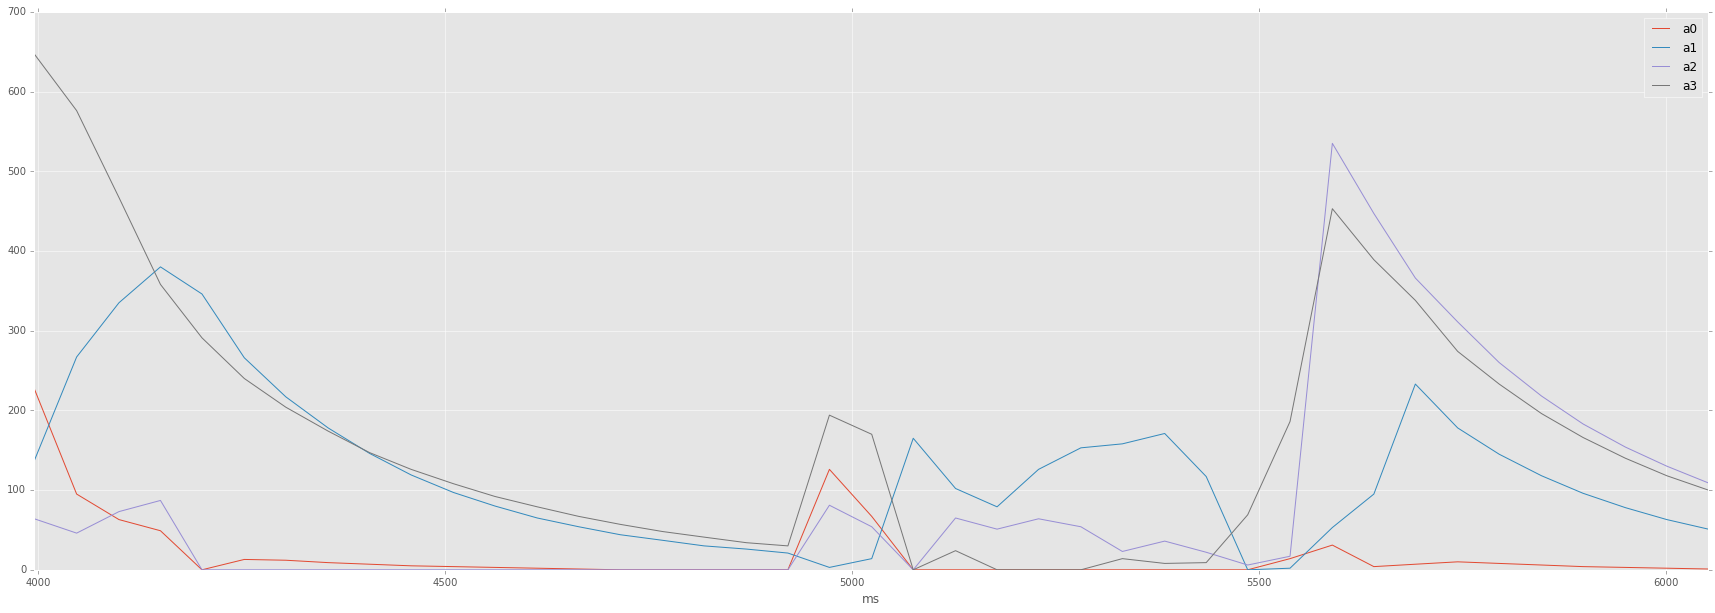

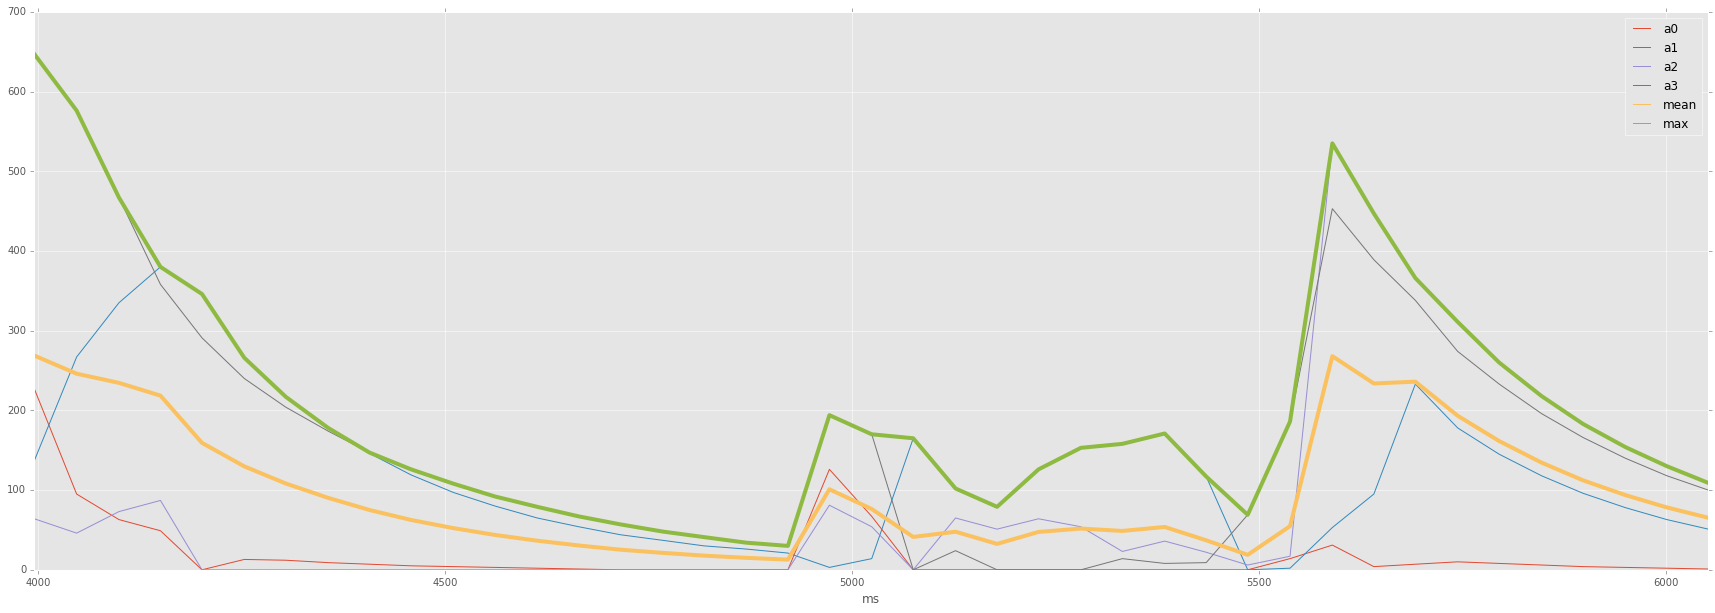

In [41]:
reading_1_a1_df = reading1_df[['ms', 'a0', 'a1', 'a2', 'a3']]
ax = reading_1_a1_df.plot(x='ms', figsize=(30,10))
map(lambda x: x.set_linewidth(2), ax.lines)

reading1_a0_df = reading1_df[['ms', 'a0', 'a1', 'a2', 'a3', 'mean', 'max']]
ax = reading1_a0_df.plot(x='ms', figsize=(30,10))
map(lambda x: x.set_linewidth(2), ax.lines)
ax.lines[-1].set_linewidth(4)
ax.lines[-2].set_linewidth(4)